## Import Libraries (Dataset, Preprocessing, Modeling, reporting, graph plotting)

In [36]:
# Dataset
from tensorflow.keras.datasets import mnist

#preprocessing
from sklearn.preprocessing import LabelBinarizer
#model construction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#report/accuracy
from sklearn.metrics import classification_report
#graph
import matplotlib.pyplot as plt
import numpy as np

import ssl

## Import Dataset

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
testImage = x_test[0]

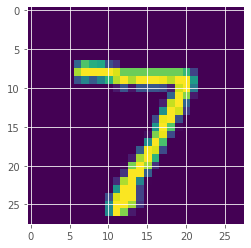

In [39]:
plt.imshow(testImage)

## Reshape x train and x test

In [40]:
x_train = x_train.reshape(x_train.shape[0], 28*28*1)
x_test = x_test.reshape(x_test.shape[0], 28*28*1)

## Normalize x train and x test by dividing by 255 (255 because that is the range of color values)

In [41]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

## Use label binarizer to encode y train and test these are the labels used for classification

In [42]:
lb = LabelBinarizer()
y_train= lb.fit_transform(y_train)
y_test = lb.transform(y_test)

## Construct Model the type is Sequential followed by 3 dense layers only first contains input shape that is set to 784, note that this is same as: 28*28*1 which we've used to reshape x train and x test
### First 2 layers contain sigmoid activation last contains softmax
### Output shape of first layer starts with 256 (again this comes from color values 0-255) and is cut to half in the next layer
### Output shape of last layer is 10 (this is because we've 10 labels to classify)

In [43]:
model = Sequential()
model.add(Dense(256, input_shape=(784,),activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Set the optimizer in this case SGD and compile model with loss function set to categorical_crossentropy optimizer SGD (obviously) and metrics accuracy (this is pretty much the same for all practicals)
### store history and fit model on training data, provide validation data in a tuple, set epoch to 100 and batch size to 128 (why? no idea!)

In [45]:
sgd = SGD(0.01)#Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties 
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [46]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 2.2808 - accuracy: 0.1747 - val_loss: 2.2406 - val_accuracy: 0.1949
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2077 - accuracy: 0.4035 - val_loss: 2.1665 - val_accuracy: 0.5145
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 2.1201 - accuracy: 0.5694 - val_loss: 2.0573 - val_accuracy: 0.6545
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 1.9903 - accuracy: 0.6356 - val_loss: 1.8977 - val_accuracy: 0.6739
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 1.8067 - accuracy: 0.6644 - val_loss: 1.6875 - val_accuracy: 0.6699
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 1.5868 - accuracy: 0.6785 - val_loss: 1.4613 - val_accuracy: 0.6941
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 1.3734 - accuracy: 0.7033 - val_loss: 1.2622 - val_accuracy: 0.7192

In [47]:
testPredict = model.predict(x_test)
maxi = max(testPredict[0])
for i in range(10):
    if testPredict[0][i] == maxi:
        print(i)
        break

313/313 [==============================] - 1s 2ms/step
7


## Plot the results the code is self explainatory

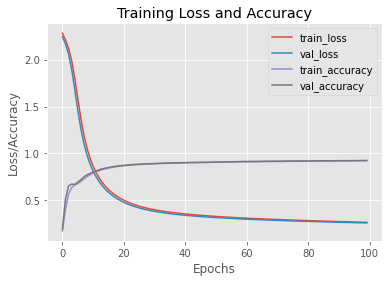

In [48]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,100), history.history['loss'], label="train_loss")
plt.plot(np.arange(0,100), history.history['val_loss'], label="val_loss")
plt.plot(np.arange(0,100), history.history['accuracy'], label="train_accuracy")
plt.plot(np.arange(0,100), history.history['val_accuracy'], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()